# [Applied Statistics](https://lamastex.github.io/scalable-data-science/as/2019/)
## 1MS926, Spring 2019, Uppsala University 
&copy;2019 Raazesh Sainudiin. [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# 09. Estimation, Likelihood, Maximum Likelihood Estimators and Regressions



- Estimation and Likelihood
- Parameter, Models, and Real Life
- The Likelihood Function
- The Likelihood Function for the $Bernoulli(\theta)$ RV
- The Log-likelihood Function
- Maximum Likelihood Estimator
- Example: New Zealand Lotto Data
- Using Sage for Basic Algebra and Calculus
- Symbolic Expressions for the Maximum Likelihood Estimator using Sage
- New Zealand Earth Quakes - Inter-occurrence times
- The Maximum Likelihood Principle
- Maximum Likelihood and the $Exponential(\lambda)$ RV
- Inter-earthquake Times for New Zealand Earthquakes
- Regression
  - Point Estimation (parametric estimation with the likelihood principle and MLE)
    - linear and logistic models and their least-squares estimators
    - problem of prediction: in regression and classification
      - correlation versus causation
      - assessing fit using diagnostic plots
  - Point Estimation (with empirical risk minimisation principle - point estimation with validation of penalised least squares estimators)
    - bias-variance trade-off (over-fitting)
    - hold-out estimators including cross-validation
  

## Estimation and Likelihood

**Likelihood** is one of the most fundamental concepts in **statistical inference**.  You may have already met some of its applications in other statistics courses, if not there is no sweat!  We will see the ideas from scratch.  The following three so-called decision problems are our main attractions in this likelihood tour.

- **Point estimation**.  A 'single best guess' at some quantity of interest.
- **Set estimation**. Guess a set that traps some quantity of interest with a high probability, for example, a confidence interval.
- **Hypothesis testing**.  Attempt to reject a falsifiable null hypothesis, i.e., make scientific progress through Popper's [falsifiability](http://en.wikipedia.org/wiki/Falsifiability), an important concept in [science](http://en.wikipedia.org/wiki/Science) and the [philosophy of science](http://en.wikipedia.org/wiki/Philosophy_of_science).

Likelihood also comes into regression, classification, risk minimisation, *all Bayesian methods*, etc. ...

There are two types of estimation.  In this worksheet we are looking at **parametric estimation**.  The other kind of estimation is *non-parametric estimation*.

## Parameters, Models and Real Life

What do we mean by parametric estimation?  In parametric estimation, we assume that the data comes from a particular type of probability distribution and we try to estimate the parameters of that distribution.  What are parameters, in a statistical sense?  Remember the $Bernoulli(\theta)$ random variable?  A $Bernoulli$ distribution has one parameter, usually denoted as $\theta$.  We talked about modelling events such as the outcome of a toss of a coin as using the $Bernoulli(\theta)$ random variable.  If the coin is fair then, in our model, $\theta = \frac{1}{2}$.  If the random variable $X$ takes value 1 when the fair coin lands heads, then we model $P(X = 1) = \frac{1}{2}$.

When we speak about the probability of observing events such as the outcome of a toss of a coin, we are assuming some kind of model.  In the case of a coin, the model is a $Bernoulli$ RV. This model would have one parameter,  the probability of the coin landing heads.

When we introduced the $Exponential$ distribution, we talked about the $Exponential(\lambda$) RV, or the $Exponential$ parameterised by $\lambda$.  Distributions can be parameterised by more than one quantity.  We have already met the $Uniform(\theta_1, \theta_2)$ - this has two parameters, $\theta_1$ and $\theta_2$.  Another distribution you may be familiar with, although we have not discussed it in this course, is the Normal distribution which is parameterised by $\mu$ and $\sigma$.   The symbols like $\theta$, $\lambda$, $\mu$, $\sigma$ are conventionally used for the parameters of these distributions.  It is useful to  become familiar with these conventions (see for example Wikipedia on the Exponential  or Normal)

There are many applications of computational statistics which involve models of real life events, and it is not enough to say "this can be modeled with a $Bernoulli$ RV", or "Orbiter bus inter-arrival times can be modelled with an $Exponential$ RV".  We also have to choose parameters for our models.

We also remind ourselves that the probabilty density function (probability mass function for a discrete random variable) and distribution function depend on the parameters when we write them.  In the case of the $Bernoulli$, for example, the probability mass function is denoted by  $f(x;\theta)$.  

In real life, we are usually not trying to do "textbook" examples like calculating the probability of an event given a distribution and parameter value(s).  We may be able to see the outcomes of a process, but we can never know exactly what that process is, all we can do is try to find a useful model for it.  We are trying to use the information available to us in the form of observations or data to make our models, including guessing/estimating values for the model parameters.   We have to turn our thinking around and focus on what the data can tell us about the model.  In particular, in this course, we focus on what the data can tell us about model parameters - parametric estimation.   Now is a good time to reflect on these words of the renowned Statisticians:

> All models are wrong, but some are useful --- George Edward Pelham Box

> The only math I did not use is the one I did not know -- Lucien Le Cam

## The Likelihood Function

Likelihood, as we said above, is a fundamental concept in statistical inference ("inference" - making inferences from observations, making guesses based on information in data).

In informal terms, likelihood is "the likelihood of the parameters given the data".  We can talk about a likelihood function where the domain of the likelihood function is all the possible values for the parameters (remember, a function is a mapping from a domain to a range): the likelihood function is a mapping from possible values for the parameters to the likelihood of those parameters given the data.  

The likelihood function of $\theta$ based on $n$ observations $x_1, x_2, \ldots, x_n$ is denoted $L_n(\theta)$.  We have said that it is a mapping from "all possible values for the parameters", i.e. all possible values for $\theta$, to the likelihood of those parameters given the data $x_1, x_2, \ldots, x_n$.  In our formal notation, if we know that $\theta$ must be somewhere in some parameter space ${\mathbf{\Theta}}$, then $L_n(\theta)$ is a mapping from $\mathbf{\Theta}$ to the real numbers $\mathbb{R}$:

$$L_n(\theta): \mathbf{\Theta} \rightarrow \mathbb{R}$$

For example, in the case of a $Bernoulli(\theta)$ RV, we know that the parameter $\theta$ must be between 0 and 1, or $\theta \in [0,1]$.  In the case of an $Exponential(\lambda)$ random variable parameterised by $\lambda$, we know $\lambda > 0$, i.e., $\lambda \in (0,\infty)$

We will focus on the likelihood function for independent and identically distributed (IID) random variables.

Suppose we have $X_1,X_2,\ldots,X_n$ as $n$ independent random variables and they are all identically distributed with $f(x;\theta)$.   We would write this as $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$.   Then, 

$$X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$$

implies that  
$$
\begin{array}{ll}
L_n(\theta) &:= L_n(x_1,x_2,\ldots,x_n;\theta)\\
&= f(x_1,x_2,\ldots,x_n; \theta)\\
&= f(x_1;\theta)\,f(x_2;\theta) \ldots f(x_n;\theta) \\
&=: \prod_{i=1}^n f(x_i ; \theta)\\
\end{array}
$$

$f(x_1,x_2,\ldots,x_n; \theta)$ is termed the joint density of $X_1, X_2, \ldots, X_n$ given $\theta$

When $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$ the joint density $f(x_1, x_2, \ldots, x_n; \theta)$ is the product of the individual densities $\displaystyle \prod_{i=1}^n f(x_i ; \theta).$

So when $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta)$, 

$$L_n(\theta) := \prod_{i=1}^n f(x_i ; \theta)$$
 

### The likelihood Function for the $Bernoulli(\theta)$ RV

We can make all this theory a little more real by considering the $Bernoulli$ RV.  In the last worksheet, we wrote function to be able to simulate samples from a $Bernoulli(\theta)$ RV given some value for the parameter $\theta$ and the number of samples required.  Suppose we used this function, with a small adaptation, to simulate some samples now using $\theta^*$ - but there is a catch:  you don't know what the value of $\theta^*$ is. 

In [4]:
# this needs to be hidden
def bernoulliFInverse(u, theta):
    '''A function to evaluate the inverse CDF of a bernoulli.
    
    Param u is the value to evaluate the inverse CDF at.
    Param theta is the distribution parameters.
    Returns inverse CDF under theta evaluated at u'''
    
    return floor(u + theta)
    
def bernoulliSampleSecretTheta(n, theta=0.30, mySeed=30):
    '''A function to simulate samples from a bernoulli distribution.
    
    Param n is the number of samples to simulate.
    Param theta is the bernoulli distribution parameter.
    Param mySeed is a seed for the random number generator, defaulting to None.
    Returns a simulated Bernoulli sample as a list.'''
    set_random_seed(mySeed)
    us = [random() for i in range(n)]
    set_random_seed(None)
    # use bernoulliFInverse in a list comprehension
    return [bernoulliFInverse(u, theta) for u in us] 


from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>

To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
n = 20
bSample = bernoulliSampleSecretTheta(n)
bSample

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0]

What we have is $X_1,X_2,\ldots,X_n \overset{IID}{\sim} Bernoulli(\theta^*)$ where $\theta^* \in [0,1]$ is the true, unknown value of the parameter $\theta$ responsible for producing all those observations.

Recall that the $Bernoulli(\theta)$ RV $X$ has probability mass function (PMF), for $x \in \{0, 1\}$, $f(x;\theta)$: 

$$
f(x;\theta)= \theta^x (1-\theta)^{1-x} 
=\begin{cases}
\theta & \text{ if } \ x=1,\\
1-\theta &\text{  if } \ x=0,\\
0 & \text{ otherwise} 
\end{cases}
$$

So, for $x_1, x_2, \ldots, x_n \in \{0,1\}$, the joint density of $n$ IID $Bernoulli(\theta)$ RVs is:

$$
\begin{array}{lcl}
f(x_1,x_2,\ldots,x_n; \theta) 
:= \displaystyle\prod_{i=1}^n f(x_i ; \theta) 
& = & \prod_{i=1}^n\theta^{x_i}(1-\theta)^{1-x_i}\\ 
& = & \theta^{\sum_{i=1}^n x_i} (1-\theta)^{\left(n - \sum_{i=1}^n x_i\right)} 
\end{array}
$$

$\sum_{i=1}^n x_i$ is a bit of a mouthful, so lets summarise this as $t_n = \displaystyle\sum_{i=1}^n x_i$

We can use $t_n$ to make our likelihood function a little more user-friendly:

$$L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$$

What we have actually done is to define a statistic of the data.  Remember that a statistic is a function of the data.  We will call our statistic (note the big T) $T_n$.  The $n$ subscript reminds us that it is a function of $n$ observations. 

$T_n$ is a function of the data, a mapping from the data space $\mathbb{X}$ to the space $\mathbb{T}_n$:

$$
T_n(X_1, \ldots, X_n) = \displaystyle \sum_{i=1}^n X_i : \mathbb{X} \rightarrow \mathbb{T}_n
$$

(If you are wondering what the space $\mathbb{T}_n$ is for the $Bernoulli$, think about the range of possible values of $\displaystyle\sum_{i=1}^n X_i$ when each $X_i$ can only be 0 or 1.)

We have some actual observations $x_1, \ldots, x_n$ so we have a realisation of our statistic $T_n(x_1, \ldots, x_n) = t_n = \displaystyle\sum_{i=1}^n x_i$

We can easily use Sage to calculate $t_n$ for us, using the sum function.  For example, for the small sample of 20 simulated Bernoulli observations above:

In [5]:
bSample = bernoulliSampleSecretTheta(10)
print bSample
tn = sum(bSample)
tn

[0, 1, 0, 1, 0, 0, 1, 0, 0, 0]


3

We can also write ourselves a Sage function to calculate the likelihood of a specified value of $\theta$ given $n$ and $t_n$.  

In [6]:
def likelihoodBernoulli(theta, n, tStatistic):
    '''Bernoulli likelihood function.
    theta in [0,1] is the theta to evaluate the likelihood at.
    n is the number of observations.
    tStatistic is the sum of the n Bernoulli observations.
    return a value for the likelihood of theta given the n observations and tStatistic.'''
    retValue = 0 # default return value
    if (theta >= 0 and theta <= 1): # check on theta
        mpfrTheta = RR(theta) # make sure we use a Sage mpfr 
        retValue = (mpfrTheta^tStatistic)*(1-mpfrTheta)^(n-tStatistic)
    return retValue

**Note:** We use `RR(theta)` above to make sure that we use a  souped-up Sage multi-precision floating-point real (mpfr) number type in our calculation, which will improve the precision of the calculation of the likelihoods.

### YouTry in class

You should be able to understand what the `likelihoodBernoulli` function is doing and be able to write this kind of SageMath function for yourselves.  Why do we need to check that the value for `theta` passed to the function is between 0 and 1?  How does the function deal with a situation where it is asked to evaluate a likelihood for `theta < 0` or `theta > 1`?

(end of You Try)

---

Let's look at a very simple situation where we have one observation ($n=1$) and it is a 0.  What is the realisation of $T_1$, $t_1$?

In [7]:
bernoulliSample0 = [0]
tn = sum(bernoulliSample0)
tn

0

### YouTry in class

Try going back to the $Bernoulli$ likelihood function $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$ to calculate the likelihood of $\theta =0$ without using the SageMath function. Think about what the likelihood function is doing. 

When you have done that, check that you get the same answer using our `likelihoodBernoulli` SageMath function:

In [8]:
tryTheta0 = 0 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
# calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta0, n, tn)

1.00000000000000

What about $\theta = 1$?  What is the likelihood of $\theta = 1$ when we have observed 0?  Think back to what the $\theta$ parameter means in a $Bernoulli$ distribution:

The $Bernoulli(\theta)$ RV $X$ has probability mass function (PMF), for $x \in \{0, 1\}$, $f(x;\theta)$: 

$$
f(x;\theta)= \theta^x (1-\theta)^{1-x} =\begin{cases}\theta& \text{ if } \ x=1,\\1-\theta &\text{ if } \ x=0,\\0 & \text{ otherwise} \end{cases}
$$

Remember that the idea behind the likelihood function is "what is the likelihood of a parameter value given our data?"

When you have worked out the answer using $L_n(\theta)$, check using our `likelihoodBernoulli` SageMath function:

In [9]:
tryTheta1 = 1 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
# calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta1, n, tn)

0.000000000000000

What about $\theta = \frac{1}{2}$?

In [10]:
tryTheta1 = 0.5 # a value of theta to find the likelihood for
n = len(bernoulliSample0) # find n as the length of the sample list
tn = sum(bernoulliSample0) # find tn as the sum of the samples
# calculate the likelihood of theta=tryTheta0=0
likelihoodBernoulli(tryTheta1, n, tn)

0.500000000000000

Try to sketch the likelihood function over $\theta \in [0,1]$ for our one observation of 0.

Now, what if instead of observing a 0 in our one-observation case, we had observed a 1?

What is our realisation of $T_n$ now?  What is our intuition about the likelihood of $\theta = 0$? $\theta = 1$? 

Again try to sketch the likelihood function for our single observation of 1.

We could use `likelihoodBernoulli` and a for loop to calculate the likelihood for some different values of $\theta$ without repeating code: 

In [11]:
bernoulliSample1 = [1]
n = len(bernoulliSample1) # find n as the length of the sample list
tn = sum(bernoulliSample1) # find tn as the sum of the samples
from pylab import arange # import arange from pylab
for t in arange(0, 1.1, 0.2):
    # calculate the likelihood of theta=tryTheta0=0
    print "If we observe", bernoulliSample1, \
        "The likelihood of theta=", t, " is ", \
        likelihoodBernoulli(t, n, tn)

If we observe [1] The likelihood of theta= 0.0  is  0.000000000000000
If we observe [1] The likelihood of theta= 0.2  is  0.200000000000000
If we observe [1] The likelihood of theta= 0.4  is  0.400000000000000
If we observe [1] The likelihood of theta= 0.6  is  0.600000000000000
If we observe [1] The likelihood of theta= 0.8  is  0.800000000000000
If we observe [1] The likelihood of theta= 1.0  is  1.00000000000000


Or, we could use a list comprehension to get a list of likelihoods corresponding to the list of possible values of $\theta$:

In [12]:
ths = arange(0, 1.1, 0.2)
[likelihoodBernoulli(t,len(bernoulliSample1),sum(bernoulliSample1)) \
     for t in ths]

[0.000000000000000,
 0.200000000000000,
 0.400000000000000,
 0.600000000000000,
 0.800000000000000,
 1.00000000000000]

If you have forgotten about the arange function, it is a useful way of getting a sequence of values in steps.  We have used the statement `from pylab import arange` because we don't want the whole of the `pylab libary`, just `arange`.  Check the documentation if you need a reminder about `arange`.

In [13]:
?arange

You will see that the `arange` function can take values for `start`, `stop`, and `step`.  You will also see that (like `range`), the list you get will go to just below the value you specifiy for `stop`.  To get a list of values from 0 to 1 in steps of 0.2 our `stop` value was 1.1.  1.2 would also have worked, but a `stop` value of 1.3 or 1.4 would have given us a list from 0 to 1.2 in steps of 0.2. 

Try some different values in `arange` if you want to check how it works again. *But you should recall this from last week really!*.

In [14]:
from pylab import arange
arange(0, 1.1, 0.2)

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

(end of You Try)

---

Now, we look at a possible sample of $n=2$ observations from a Bernoulli process with unknown $\theta$:

In [15]:
smallBSample = [0,1]

What is the realisation of the $T_n$ statistic?

In [16]:
tn = sum(smallBSample) # what is tn
tn

1

Use $L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)}$ to think about the likelihood of some possible values for $\theta$ given this data.  Think what the shape of the likelihood function might be. 

In the visualisation below we have used our `likelihoodBernoulli` function to plot the likelihood function for the cases where we have a single observation 0, a single observation 1, and a small sample of size two with observations: 0, 1.

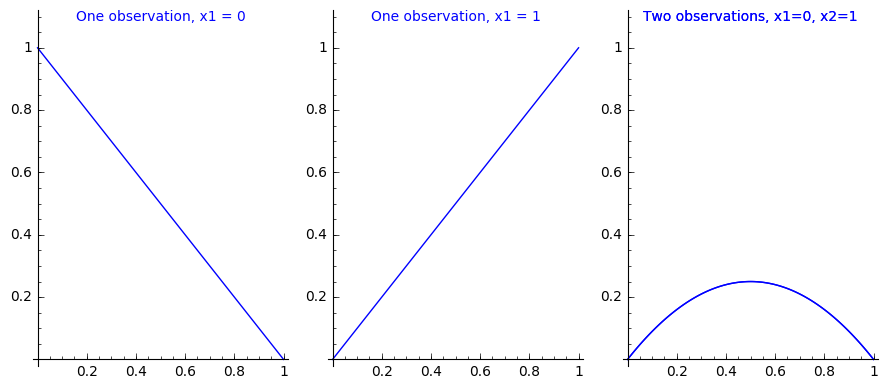

In [17]:
bernoulliSample0 = [0] # make sure we know about our samples
bernoulliSample1 = [1]
smallBSample = [0,1]
from pylab import arange
ths = arange(0,1.01,0.01) # get some values to plot against
p1 = line(zip(ths, [likelihoodBernoulli(t, len(bernoulliSample0),sum(bernoulliSample0)) for t in ths]))
t1 = text("One observation, x1 = 0", (0.5,1.1), fontsize=10)
p1 = p1+t1
p2 = line(zip(ths, [likelihoodBernoulli(t, len(bernoulliSample1),sum(bernoulliSample1)) for t in ths]))
t2 = text("One observation, x1 = 1", (0.5,1.1), fontsize=10)
p2 = p2+t2
p3 = line(zip(ths, [likelihoodBernoulli(t, len(smallBSample),sum(smallBSample)) for t in ths]))
t3 = text("Two observations, x1=0, x2=1", (0.5,1.1), fontsize=10)
p3 = p3+t3
show(graphics_array([p1, p2, p3]),figsize=[9,4])

There are other samples we could get if we draw a sample of size $n=2$ from a $Bernoulli$ RV.  In the visualisation below we plot the likelihood functions for the four unique possible samples:

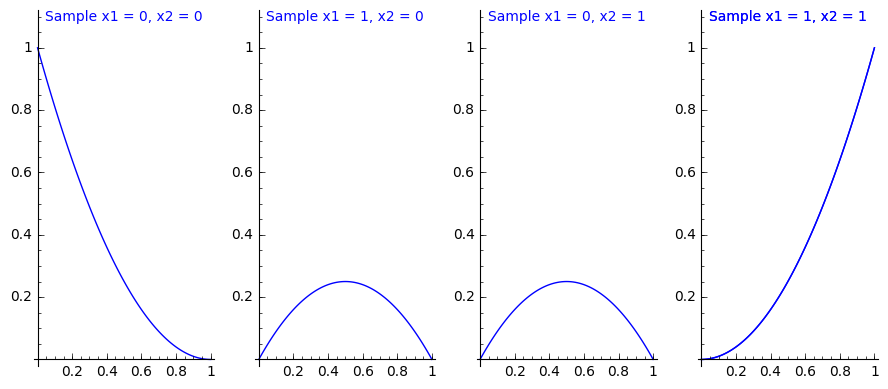

In [18]:
smallBSample1 = [0,0]
smallBSample2 = [1,0]
smallBSample3 = [0,1]
smallBSample4 = [1,1]
listOfSamples = [smallBSample1, smallBSample2, smallBSample3, smallBSample4] # a list of lists
from pylab import arange
ths = arange(0,1.01,0.01) # get some values to plot against
l_plots = [] # an empty list of plots
for sample in listOfSamples: # go through the list of samples one by one
    ptitle = text("Sample x1 = " + str(sample[0]) + ", x2 = " + str(sample[1]), (0.5,1.1), fontsize=10)
    l_plots.append(line(zip(ths, [likelihoodBernoulli(t, len(sample),sum(sample)) for t in ths])) + ptitle) # append plot to list of plots
show(graphics_array(l_plots),figsize=[9,4]) # show the list of plots

We can see that the shape of the likekihood function depends on the sample:  we are looking at the likelihood for the parameter given the actual data.  

You do not have to know how to do these plots or the interactive plot below, but you should understand what a list comprehension statement like

`[likelihoodBernoulli(t,len(smallBSample),sum(smallBSample)) for t in ths]`

is doing, when `ths = arange(0, 1.01, 0.01)` are some possible values for $\theta \in [0,1]$

What happens as we increase the sample size $n$?  In the interactive plot below, we use our `bernoulliSampleSecretTheta` to simulate samples of size $n$ with an unknown $\theta$.  You can have a look at the effect of increasing $n$:

In [19]:
@interact
def _(n=(2,(2..1000))):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        print "Likelihood function for n = ", n , " and tn = ", tn
        from pylab import arange
        ths = arange(0,1,0.01) # get some values to plot against
        p = line(zip(ths, [likelihoodBernoulli(t, n, tn) for t in ths]))
        show(p, figsize=(8,4))
    else:
        print "n must be greater than 0"

Remember that for each $n$ you try, the shape of the likelihood function will depend on the $t_n$ for the sample simulated by `bernoulliSampleSecretTheta`.

The Log-likelihood Function

Working with products, as in 

$$
L_n(\theta) = \displaystyle \prod_{i=1}^n f(x_i;\theta) \quad \text{,  where  } X_1, X_2, \ldots, X_n \overset{IID} \sim f(x_i;\theta)
$$ 

(i.e., $n$ independent and identically distributed random variables), can be inconvenient. Taking logs can be useful here.  The log-likelihood function for some parameter $\theta$ is $l_n(\theta)$ and it is literally the log of the likelihood function $L_n(\theta)$:

$$l_n(\theta) := log(L_n(\theta))$$

You will probably recall from pre-calculus that $\log(a \times b) = \log(a) + \log(b)$.

In SageMath, using the `log` function without specifying a base gives the natural logarithm (logarithm to base $e$) of a value.

In [20]:
a = 5.0
b = 6.0
log(a*b)

3.40119738166216

In [21]:
log(a) + log(b)

3.40119738166216

In [22]:
?log

The SageMath `log` function provides a default parameter value of `None` for the base, and if the base is `None` the natural log is calculated.  If you specify a value for the base when you use the `log` function, you will get the logarithm using this base (default parameter values and `Non`e were discussed in the last notebook:  go back there in your own time if you need to).

In [23]:
log(a, 10) # log to base 10

0.698970004336019

We can generalise this into a useful trick:  "the log of products is the sum of logs"

$$\log\left(\displaystyle\prod_{j=1}^n y_j\right) = \displaystyle\sum_{j=1}^n\left(\log(y_j)\right)$$

So, if we have $n$ IID (independent and identically distributed) random variables, the log-likelihood function is

$$
X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\theta) \Longrightarrow
l_n(\theta) = \log(L_n(\theta)) := \log\left(\prod_{i=1}^n f(x_i ; \theta)\right) = \sum_{i=1}^n \log(f(x_i; \theta))
$$

In the case of $X_1, X_2, \ldots, X_n \overset{IID}{\sim} Bernoulli(\theta)$, $n$ independent and identically distributed $Bernoulli$ RVs,

$$
l_n(\theta) = \log(L_n(\theta)) = \log\left(\theta^{t_n}(1-\theta)^{(n-t_n)}\right) = t_n\log(\theta) + (n-t_n)\log(1-\theta)
$$

Here we are using the fact that $\log(a^c) = c\log(a)$. 

If this is not familiar to you, consider $\log(a^2) = \log(a \times a) = \log(a) + \log(a) = 2\log(a)$

and then think what happens if you have $\log(a^3) = \log(a \times a^2) = \log(a) +\ log(a^2) = \log(a) + 2log(a) = 3\log(a)$, etc etc.

### YouTry in class

Write down for yourself the steps to prove that the log-likelihood function $l_n(\theta) = t_n\log(\theta) + (n-t_n)\log(1-\theta)$ for $n$ IID samples from $Bernoulli$ RVs.

(end of You Try)

---

Logarithm is a **monotone function** (also known as a monotonic function).  What does it mean when we say that something is a monotone function?  In words, it means that the function preserves the given order.  For once, putting something as a formula may make it easier to understand than the words.  If $f$ is some monotone function and we have two values $a$ and $b$ in the domain of $f$ (values that $f$ can be applied to) such that $a \le b$, then $f(a) \le f(b)$.

So, if $a \le b$, $\log(a) \le \log(b)$:  log preserves order.   If we calculatete the likelihood $L_n$ for two different possible values of $\theta$, say $\theta_a$ and $\theta_b$ and find that $L_n(\theta_a) \le L_n(\theta_b)$, then we know that $l_n(\theta_a) = \log(L_n(\theta_a)) \le l_n(\theta_b) = \log(L_n(\theta_b))$.

We can see this if we adapt our interactive plot for the $Bernoulli$ likelihood function:

In [24]:
@interact
def _(n=(2,(2..1000))):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        print "n = ", n , " and tn = ", tn
        from pylab import arange
        ths = arange(0,1,0.01) # get some values to plot against
        liks = [likelihoodBernoulli(t,n,tn) for t in ths]
        p1 = line(zip(ths, liks))
        p1 += text("Likelihood function", (0.5, max(liks)*1.1))
        thsForLog = arange(0.01,1,0.01) # fudge to avoid log(0) get some values to plot log against
        logliks = [log(likelihoodBernoulli(t,n,tn)) for t in thsForLog]
        p2 = line(zip(thsForLog, logliks), rgbcolor="red")
        p2 += text("Log-likelihood function", (0.5, max(logliks)*0.8), rgbcolor="red")
        show(graphics_array([p1, p2]),figsize=[8,3])
    else:
        print "n must be greater than 0"

# Maximum Likelihood Estimator

So now, we know about the **likelihood function**, the function that tells us about the likelihood of parameter values given the data, and we know about the **log-likelihood function**.   How do either of these help us to make an estimate of a parameter value? 

How about estimating a parameter with the value that maximises the likelihood function?   This is called the **Maximum Likelihood Estimator (MLE)**.

And, because log is a monotone function, we know that if some particular value for the unknown parameter maximises the likelihood function, then it will also maximise the log-likelihood function.

Formally,

Let $X_1,\ldots,X_n \sim f(x_1,\ldots,x_n;\theta^*)$ $X_1,\ldots,X_n$ have joint density $ f(x_1,\ldots,x_n;\theta^*)$ where $\theta^*$ is the true but possibly unknown parameter value.

The maximum likelihood estimator or MLE $\widehat{\Theta}_n$ of the fixed and possibly unknown parameter true parameter $\theta^* \in \Theta$ is a function that returns the value of $\theta$ that maximises the likelihood function.

As we saw when we looked at the different possible unique samples of size $n=2$ from a Bernoulli RV, the shape of the likelihood function depends on the data. The maximum likelihood estimator, the value of $\theta$ which maximises the likelihood function (or log-likelihood function) is clearly a function of data itself. 

$$
\widehat{\Theta}_n := \widehat{\Theta}_n(X_1,X_2,\ldots,X_n) := \underset{\theta \in \Theta}{argmax} \, L_n(\theta) 
$$
Equivalently, the maximum likelihood estimator is the value of $\theta$ that maximises the log-likelihood function:
$$
\widehat{\Theta}_n := \underset{\theta \in \Theta}{argmax} \, l_n(\theta)
$$

$\underset{\theta in \Theta}{argmax}L_n(\theta)$ is the value of $\theta \in \Theta$ that maximises $L_n(\theta)$.   $argmax$ is doing what we try to do by eye when we look at the shape of a likelihood function and try to see which value of $\theta$ corresponds to the function's highest point. 

How do we find the value which maximises the likelihood function, or log-likelihood function?  What do we usually do when we want to find the value of a parameter which maximises a function?   We find the turning point(s) of the function by taking the derivative of the function with respect to the parameter (for maximums, we are looking for turning points where the slope of the function changes from positive to negative, which we could check with a second derivative, but let's just concentrate on finding the derivative for the moment).

Consider finding the maximum likelihood estimator for $X_1, X_2, \ldots, X_n \overset{IID}{\sim} Bernoulli(\theta^*)$ ($n$ independent Bernoulli random variables, identically distributed with the same true parameter value $\theta^*$):

We found that the likelihood function $L_n(\theta) = \theta^{t_n} (1-\theta)^{(n-t_n)}$ and the log-likelihood function $l_n(\theta) = t_n\log(\theta) + (n-t_n)\log(1-\theta)$.

It is much easier to work with the log-likelihood function when we are taking the derivative with respect to $\theta$:

$$
\begin{eqnarray}
\frac{\partial}{\partial \theta} l_n(\theta)
&=& \frac{\partial}{\partial \theta}  t_n \log(\theta) + \frac{\partial}{\partial \theta}  (n-t_n) \log(1-\theta) \notag \\
&=& \frac{t_n}{\theta} - \frac{n-t_n}{1-\theta} \notag
\end{eqnarray}
$$

Here, we are using the useful fact that $\frac{\partial \log(\theta)}{\partial \theta} = \frac{1}{\theta}$ (and $\frac{\partial \log(1-\theta)}{\partial \theta} = \frac{-1}{1-\theta})$

Now, set $\frac{\partial}{\partial \theta} l_n(\theta)=0$ and solve for $\theta$ to obtain the maximum likelihood estimate  $\widehat{\theta}_n$:

$$
\frac{\partial}{\partial \theta} l_n(\theta)) = 0 \iff
\frac{t_n}{\theta} = \frac{n-t_n}{1-\theta} \iff
\frac{1-\theta}{\theta} = \frac{n-t_n}{t_n} \iff
\frac{1}{\theta}-1 = \frac{n}{t_n}-1 \iff \widehat{\theta}_n = \frac{t_n}{n}
$$

What was $t_n$?  

$t_n = \displaystyle \sum_{i=1}^n x_i$, so we can see that $\widehat{\theta}_n = \frac{1}{n}\displaystyle\sum_{i=1}^n x_i$

In general, the maximum likelihood estimator as a function of the RVs $X_1, X_2, \ldots, X_n$  is:

$$
\widehat{\Theta}_n(X_1,X_2,\ldots,X_n) = \frac{1}{n}T_n(X_1,X_2,\ldots,X_n) = \frac{1}{n} \sum_{i=1}^n X_i = \overline{X}_n
$$

Now, let's look an another version of the interactive plot of the log-likelihood function for a sample of size $n$ from a $Bernoulli$ process with unknown $\theta^*$, but this time we will show the maximum point on the function and the maximum likelihood estimator (MLE):

In [14]:
@interact
def _(n=(2,(2..2000))):
    '''Interactive function to plot the bernoulli likelihood for different n.'''
    if n > 0:
        thisBSample = bernoulliSampleSecretTheta(n) # make sample
        n = len(thisBSample) # what is n
        tn = sum(thisBSample)
        from pylab import arange
        thsForLog = arange(0.01,1,0.01) # fudge to avoid log(0) get some values to plot log against
        logliks = [log(likelihoodBernoulli(t,n,tn)) for t in thsForLog]
        p = line(zip(thsForLog, logliks), rgbcolor="red")
        MLE = RR(tn/n)
        MLEpt = (MLE, log(likelihoodBernoulli(MLE,n,tn)))
        p += points(MLEpt,rgbcolor="red", pointsize=30)
        print "Log-likelihood function for n = ", n , " and tn = ", tn, ": MLE = ",MLE.n(digits = 3)
        show(p,figsize=[8,3])
    else:
        print "n must be greater than 0"

### YouTry
What happens above as you gradually increase $n$?  What do you think the true value $\theta^*$ is?

# Example : New Zealand Lotto Data

Now, we are going to apply what we have learned about maximum likelihood estimates to the the NZ lotto data we looked at earlier in the course.  Specifically, we are interested in whether Ball One is odd or even.   This can be considered as a Bernoulli random variable where the outcome is 1 if the number drawn for Ball One is odd, and 0 if the number drawn is even.   The observed outcomes of the draws for Ball One are modelled as independently and identically distributed (IID) realisations of the $Bernoulli(\theta^*)$ random variable.    Thus our probability model is:

$$X_1,X_2,\ldots,X_n \overset{IID}{\sim} Bernoulli(\theta^*), \ \text{where}, \ \theta^* \in  [0,1] $$

We have provided the functions needed for you to access the data, so all you have to do is to evaluate the cell below to get a list of the Ball one data between 1987 and 2008:

In [16]:
# These lotto draws of the first ball from NZ Lotto was already downloaded and processed for you
listBallOne = [4, 3, 11, 35, 23, 12, 14, 13, 15, 19, 36, 18, 37, 39, 37, 35, 39, 1, 24, 29, 38, 18, 40, 35, \
            12, 7, 14, 23, 21, 35, 14, 32, 19, 2, 1, 34, 39, 29, 7, 20, 2, 40, 28, 4, 30, 34, 20, 37, 9, 24,\
            36, 4, 22, 1, 31, 12, 16, 29, 36, 5, 21, 23, 30, 39, 38, 22, 13, 6, 14, 30, 40, 21, 5, 12, 28, 27,\
            13, 18, 19, 23, 2, 10, 37, 31, 40, 4, 25, 4, 17, 6, 34, 26, 38, 35, 3, 38, 14, 40, 3, 30, 21, 4,\
            24, 34, 27, 14, 25, 18, 21, 1, 25, 39, 18, 40, 18, 11, 5, 37, 33, 26, 29, 26, 36, 33, 18, 32, 3, 1,\
            5, 22, 39, 25, 12, 21, 23, 12, 31, 1, 35, 8, 32, 24, 34, 14, 26, 4, 3, 31, 17, 22, 24, 10, 29, 40,\
            4, 8, 26, 11, 8, 18, 25, 22, 8, 30, 10, 14, 32, 14, 5, 35, 3, 32, 40, 17, 39, 7, 21, 4, 35, 9, 16,\
            30, 30, 11, 28, 22, 38, 5, 16, 27, 16, 23, 22, 1, 27, 32, 30, 24, 32, 29, 11, 3, 26, 19, 22, 25, 3,\
            34, 31, 17, 16, 31, 20, 29, 10, 2, 17, 36, 6, 34, 11, 7, 22, 28, 13, 15, 20, 39, 16, 10, 25, 1, 37,\
            14, 28, 35, 20, 39, 3, 39, 20, 40, 6, 20, 17, 26, 27, 4, 24, 40, 16, 24, 7, 8, 25, 16, 15, 8, 29, 13,\
            16, 39, 2, 24, 24, 23, 24, 37, 39, 40, 5, 11, 13, 6, 24, 1, 5, 7, 15, 38, 3, 35, 10, 22, 19, 3, 21,\
            39, 38, 4, 30, 17, 15, 9, 32, 28, 7, 12, 6, 37, 25, 4, 8, 30, 7, 31, 12, 21, 31, 13, 2, 20, 14, 40,\
            32, 23, 10, 1, 35, 35, 32, 16, 25, 13, 20, 33, 27, 2, 26, 12, 5, 34, 20, 7, 34, 38, 20, 8, 5, 11, 17,\
            10, 36, 34, 1, 36, 6, 7, 37, 22, 33, 7, 32, 18, 8, 1, 37, 25, 35, 29, 23, 11, 19, 7, 21, 30, 23, 12,\
            10, 26, 21, 9, 9, 25, 2, 14, 16, 14, 25, 40, 8, 28, 19, 8, 35, 22, 23, 27, 31, 36, 22, 33, 22, 15, 3,\
            37, 8, 2, 22, 39, 3, 6, 13, 33, 18, 37, 28, 3, 17, 8, 2, 36, 1, 14, 38, 5, 31, 34, 16, 37, 2, 40, 14,\
            16, 21, 40, 5, 21, 24, 24, 38, 26, 38, 33, 20, 25, 7, 33, 12, 22, 34, 34, 20, 38, 12, 20, 7, 28, 26,\
            30, 13, 40, 36, 29, 11, 31, 15, 9, 13, 17, 32, 18, 9, 24, 6, 40, 1, 1, 9, 13, 28, 19, 5, 7, 27, 12,\
            3, 34, 26, 20, 28, 28, 25, 21, 23, 6, 15, 19, 30, 10, 13, 8, 11, 38, 7, 33, 12, 16, 11, 40, 25, 32,\
            34, 1, 32, 31, 33, 15, 39, 9, 25, 39, 30, 35, 20, 34, 3, 30, 17, 24, 20, 15, 10, 25, 6, 39, 19, 20,\
            23, 16, 17, 31, 25, 8, 17, 15, 31, 20, 19, 33, 11, 37, 31, 4, 12, 37, 7, 40, 8, 22, 3, 25, 35, 8, 9,\
            14, 13, 33, 4, 2, 1, 31, 24, 8, 13, 19, 34, 10, 32, 35, 28, 11, 10, 31, 25, 8, 6, 13, 33, 19, 35, 19,\
            8, 21, 10, 40, 36, 16, 27, 31, 1, 18, 36, 40, 18, 37, 18, 24, 33, 34, 31, 6, 10, 24, 8, 7, 24, 27, 12,\
            19, 23, 5, 33, 20, 2, 32, 33, 6, 13, 5, 25, 7, 31, 40, 1, 30, 37, 19, 27, 40, 28, 3, 24, 36, 7, 22,\
            20, 21, 36, 38, 15, 11, 37, 21, 4, 13, 9, 12, 13, 34, 30, 8, 23, 40, 4, 13, 6, 4, 22, 35, 2, 35, 20,\
            9, 28, 9, 13, 33, 19, 5, 38, 24, 18, 37, 10, 25, 25, 31, 3, 13, 25, 35, 1, 36, 21, 3, 22, 23, 7, 6,\
            26, 11, 6, 1, 24, 2, 25, 38, 3, 16, 16, 20, 22, 12, 8, 27, 38, 10, 39, 9, 37, 30, 33, 12, 4, 32, 2,\
            29, 6, 34, 2, 3, 12, 9, 1, 22, 40, 38, 9, 18, 40, 17, 5, 17, 26, 17, 26, 6, 7, 18, 10, 27, 24, 39, 1,\
            3, 26, 38, 2, 12, 5, 7, 38, 2, 8, 30, 35, 18, 19, 29, 37, 5, 27, 35, 40, 14, 25, 15, 20, 32, 22, 9, 1,\
            8, 14, 38, 27, 23, 24, 15, 29, 7, 4, 19, 6, 21, 27, 23, 21, 35, 32, 13, 27, 34, 1, 11, 36, 24, 23, 13,\
            2, 33, 25, 18, 1, 10, 5, 27, 1, 36, 36, 11, 3, 31, 30, 31, 39, 7, 21, 25, 28, 38, 2, 3, 40, 10, 40,\
            12, 22, 20, 16, 14, 30, 16, 19, 33, 32, 30, 19, 36, 16, 27, 7, 18, 38, 14, 14, 33, 29, 24, 21, 22, 15,\
            25, 27, 25, 37, 35, 34, 11, 19, 35, 10, 30, 8, 11, 20, 7, 27, 19, 16, 21, 13, 6, 29, 35, 13, 31, 23,\
            26, 10, 18, 39, 38, 5, 16, 33, 21, 31, 21, 23, 32, 35, 2, 24, 11, 25, 30, 7, 18, 32, 38, 22, 27, 2, 6,\
            31, 24, 34, 33, 15, 39, 21, 9, 1, 8, 38, 37, 40, 14, 2, 25, 30, 16, 6, 36, 27, 28, 8, 17, 37, 15, 29,\
            27, 30, 30, 19, 15, 13, 34, 5, 24, 18, 40, 37, 1, 28, 17, 32, 8, 34, 5, 6, 31, 8, 9, 28, 26, 40, 40,\
            9, 23, 36, 28, 24, 33, 18, 36, 6, 22, 29, 6, 6, 25, 15, 29, 18, 38, 20, 26, 30, 17, 30, 32, 33, 19,\
            10, 29, 25, 24, 19, 28, 38, 3, 24, 12, 28, 29, 29, 20, 12, 11, 12, 21, 11, 24, 36, 3, 3, 5, 28, 2,\
            8, 30, 23, 4, 40, 28, 6, 31, 37, 25, 9, 23, 20, 20, 16, 38, 21, 35, 18, 3, 15, 40, 19, 33, 34, 20,\
            3, 11, 34, 35, 10, 32, 23, 10, 29, 13, 12, 6, 30, 7, 5, 4, 29, 22, 22, 2, 26, 24, 7, 13, 26, 27, 27,\
            15, 12, 18, 38, 33, 4, 11, 20, 33, 21, 5, 26, 10, 22, 36, 3, 4, 35, 35, 16, 32, 5, 19, 23, 24, 40,\
            25, 30, 10, 9, 23, 12, 40, 21, 29, 18, 17, 15, 32, 2, 35, 7, 30, 4, 2, 16, 6, 8, 35]

Remember that we can find how many observations we have using the len function:

In [17]:
len(listBallOne)

1114

Now we can get to what we are really interested in - whether the number drawn is odd or even.   You'll recall that we can get a 1 to represent an odd number and a 0 to represent an even number with the modulus operator `%`.

In [18]:
bernoulliBallOneOdd = [x % 2 for x in listBallOne]
#print(bernoulliBallOneOdd)

We want to start our investigation of the relative number of odd and even numbers that occur in the draws for Ball one by visualising the outcome data in terms of the proportion of odd numbers that are observed in the Ball One draws.  One way to find the number of occurrences of a particular value in a list is to use the list's `count(...)` method:

In [19]:
bernoulliBallOneOdd.count(1) # find how many 1s there are in the list bernoulliBallOneOdd

546

In [20]:
?list.count

Note also that since our Bernoulli random variable outcomes are 1 or 0, we can also count how many odd numbers are drawn by simply adding up the outcomes:  every odd number contributes 1 to the sum and the total is therefore the number of odd numbers drawn.  Doing this over all 1114 observations should give us the same value as counting the number of 1s

In [21]:
sum(bernoulliBallOneOdd)

546

This is the equivalent of $t_n = \displaystyle\sum_{i=1}^n$, the realisation of the statistic $T_n(X_1, X_2, ..., X_n) = \sum_{i=1}^n X_i$.

We saw that the Bernoulli likelihood function is $ L_n(\theta) = \theta^{t_n}(1-\theta)^{(n-t_n)} $ and the log-likelihood function is $l_n(\theta) = log( L_n(\theta))$ = $t_n$ $log(\theta) $ + $(n-t_n)$ $log(1-\theta) $

With our Bernoulli model, our maximum likelihood estimate $\widehat{\theta}_n$ for the parameter $\theta$, the probability that a ball is odd, is $\frac{t_n}{n}$ which we can see is the same as the proportion of odd-numbered balls in the sample.

Using the sum(...) function makes it very easy for us to explore how, as we look at more and more draws (samples), the proportion of odd-numbered balls settles down. 

Remember the `pylab` function `cumsum` which you can use to calculate the cumulative sum of an array or 'array-like object' (i.e. an object that the function can convert into an array, such as a list or tuple)?  We can use this to give us the cumulative sum of the number of odd-numbered balls in the sample:

In [22]:
import pylab
csBernoulliBallOneOdd = list(pylab.cumsum(bernoulliBallOneOdd))
#print(csBernoulliBallOneOdd)

Note that our lotto data and counts are `sage.rings.integer.Integer` types, but the values returned by the `pylab.cumsum` function are `numpy.int64` (plain integer) types.

In [23]:
type(bernoulliBallOneOdd[0])

<type 'sage.rings.integer.Integer'>

In [24]:
type(csBernoulliBallOneOdd[0])

<type 'numpy.int64'>

What we want to do is to visualise the changing proportion of odd numbers as we get more and more samples.  The proportion of odd numbers is the number of odds (calculated as the sum of the outcomes in the samples we have so far) over the total number of samples so far.   To help plotting this we make ourselves a sequence of sample sizes, going up from 1 to 1114:

In [25]:
sampleSize = range(1,1115,1)

Imagine you are at the end of week one of the draws (8 January 1987).  You'll have seen one draw and Ball One was 4, i.e., even.  The proportion of odd numbers is from this one draw is 0 ( = 0/1).  Then week two comes along, there is another draw, the number is 3 (odd) and so the proportion of odds in the 2 samples so far is 1/2.  Then week 3 (11, odd), so the proportion is 2/3, etc etc etc.   After each draw, we are dividing the cumulative sum of the outcomes by the number of draws to date.    If we kept doing this week after week we'd get something like this, ending up with 546 odds out of 1114 observations which simplifies to 273/557 (we are making the results display as rational numbers by converting the plain int types returned by the pylab.cumsum function to Sage integers using the ZZ(...) function to make the results easier to interpret).

In [26]:
relFreqsCsBernoulliBallOneOdd = [(i, ZZ(csBernoulliBallOneOdd[i])/sampleSize[i]) \
                                 for i in range(1114)]
#print(relFreqsCsBernoulliBallOneOdd)

With a slight variation on our list comprehension, we can make a list of points out of this, plotting the proportion of odds on the y-axis against the number of observations on the x-axis:

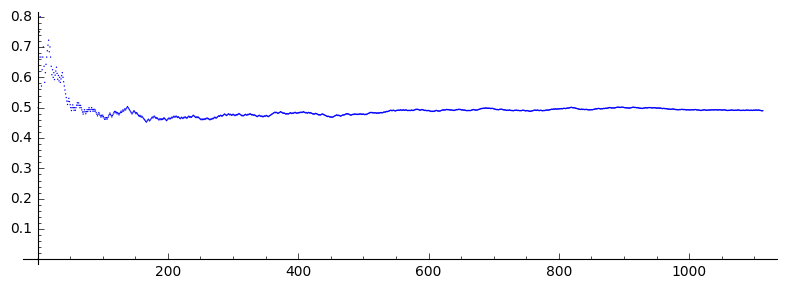

In [27]:
show(points(relFreqsCsBernoulliBallOneOdd, size=1), figsize=[8,3])

We have effectively plotted the maximum likelihood estimate or MLE $\widehat{\theta}_n$ for $\theta$ in our $Bernoulli$ model over increasing values of $n$.

We can also look at the shape of the whole log-likelihood function, not just the value that maximises it.

This interactive plot draws the log-likelihood function for samples based on for different values of $n$.  Again, for $n=1$, you have only observed the first draw, for $n=2$ you have observed two draws, etc etc.

In [28]:
@interact
def _(n=(1..1114)):
    '''Interactive function to plot sample-size specific log likelihood function.'''
    if n == 1:
        print "Log-likelihood function based on first sample"
    else:
        print "log-likelihood function based on", n,  "samples"    
    tn = csBernoulliBallOneOdd[n-1]
    theta = var('theta')
    show(plot((tn * log(theta) + (n - tn) * log(1-theta)), theta,0,1),figsize=[8,3])

Try changing $n$ to see how the shape of the log-likelihood function changes as we get more and more observations.  

We can also show the log likelihood functions for a number of different value of $n$ all on the same plot.  The first cell below shows log-likelihood functions for $n = 1$ to $n = 20$.  This is where the log-likelihood moves around most as $n$ changes.

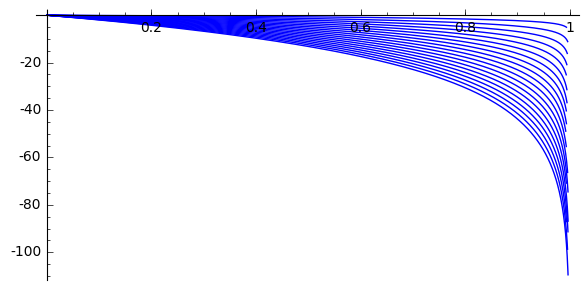

In [29]:
theta = var('theta')
n = 1
tn = csBernoulliBallOneOdd[n-1]
p = plot((tn * log(theta) + (n-tn)*log(1-theta)), theta,0,1)
for n in range(2,20,1):
    Tn = csBernoulliBallOneOdd[n-1]
    p += plot((tn * log(theta) + (n-tn)*log(1-theta)), theta,0,1)
show(p, figsize=[6,3])

Looking at larger values of n, we can see the shape of the log-likelihood function settling down as n increases.  Colour has been used to show the changing values of $n$ which result in each curved line on the plot: bluer shades for smaller $n$, moving to red as $n$ increases.  

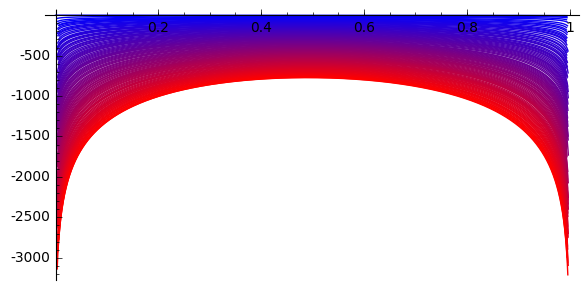

In [30]:
theta = var('theta')
n=1
Tn = csBernoulliBallOneOdd[n-1]
p = plot((Tn * log(theta) + (n-Tn) * log(1-theta)), theta,0,1, rgbcolor=(0,0,1))
for n in range(10,1111,10):
    Tn = csBernoulliBallOneOdd[n-1]
    redshade = 1*n/1114.0
    blueshade = 1 - redshade
    p += plot((Tn * log(theta) + (n-Tn) * log(1-theta)), theta,0,1, rgbcolor = (redshade, 0, blueshade))
n = 1114
p += plot((Tn * log(theta) + (n-Tn) * log(1-theta)), theta,0,1, rgbcolor="red")
show(p,figsize=[6,3])

# Using Sage for Basic Algebra and Calculus

When we wanted to differentiate the log-likelihood $l_n(\theta)$ above, we did it for ourselves, but Sage could have helped us to do even that. 

Sage can be used to find solutions to equations and for basic calculus.  The secret is to create a symbolic expression using the `var(...)` function.  The details of the symbolic rings used for symbolic expressions in Sage are beyond the scope of this course, but they do offer us some useful features. It is probably easiest to think of var as a way to tell Sage that something is a variable name without having to assign that variable to an actual value. Then, using the function  solve  we can solve equations, i.e. use Sage to find the value(s) of a variable which would solve the equation of interest, or expressions for one variable in terms of other variables involved in the equation(s).

The examples used here are taken from the book Sage Tutorial, The Sage Group.

In [46]:
x=1

In [47]:
type(x)

<type 'sage.rings.integer.Integer'>

In [51]:
x = var('x') # symbolic expression
type(x)

<type 'sage.symbolic.expression.Expression'>

In [48]:
?var

In [49]:
?solve

Let's try a simple example, solving $x^2 + 3x + 2 = 0$ for $x$.

In [52]:
solve(x^2 + 3*x + 2, x)

[x == -2, x == -1]

We can also use `solve` if we have variables instead of known values for the coefficients.

In [54]:
x, a, b, c = var('x a b c')
solve([a*(x^2) + b*x + c == 0], x)

[x == -1/2*(b + sqrt(b^2 - 4*a*c))/a, x == -1/2*(b - sqrt(b^2 - 4*a*c))/a]

And we can solve a system of equations for several variables.

In [55]:
x, y = var('x y')
solve([x+y==6, x-y==4], x, y)

[[x == 5, y == 1]]

Sometimes Sage cannot find an exact solution to the equation, as in the following cell:

In [56]:
theta = var('theta')
solve([cos(theta) == sin(theta)], theta)

[sin(theta) == cos(theta)]

Then we can try using the `find_root` function to find a numerical solution.  Note that as well as the equation, you have to pass `find_root(...)` values for the end points of the interval within which you want it to search for the solution.  In this case we are searching within the interval $[0, \frac{\pi}{2}]$.

In [57]:
find_root(cos (theta) == sin(theta), 0, pi/2)

0.7853981633974484

In [60]:
?find_root

We can also use calculus with our symbolic expressions.  We differentiate with the diff function or method.

In [314]:
u = var('u')
diff(sin(u), u)

cos(u)

We can also tackle higher derivatives, such as the fourth derivative of $\sin(x^2)$ in the following cell.

In [315]:
x = var('x')
diff(sin(x^2), x, 4)

16*x^4*sin(x^2) - 48*x^2*cos(x^2) - 12*sin(x^2)

In [316]:
?diff

Partial derivatives can also be found:

In [317]:
x, y = var('x y')
f = x^2 + 17*y^2
f.diff(x) # differentiate f with respect to x

2*x

Let's try a simple example.

In [318]:
x, y = var('x y')
f = x^2 + 17*y^2
f.diff(y) # differentiate f with respect to y

34*y

The `integral(...)` function does integration.

In [319]:
x = var('x')
integral(x*sin(x^2), x)

-1/2*cos(x^2)

## Symbolic Expressions for the Maximum Likelihood Estimator

We can use these SageMath capabilities to help us to find maximum likelihood estimators.   We will first have to find an expression for the likelihood of the parameter(s) in terms of of some statistic or statistics of the observations.  We then take logs to get a log-likelihood function (since logs are usually easier to work with).  Then, with the Sage diff function and the solve function, we have some powerful tools to then help us to differentiate and find the value at which the differential is 0. 

Let's start with the Bernoulli log-likelihood function $l_n(\theta) = log( L_n(\theta))$ = $t_n$ $log(\theta) $ + $(n-t_n)$ $log(1-\theta)$ and first of all find an expression for the differential of this with respect to $\theta$

In [61]:
theta, n, tn = var('theta n tn')
logL = tn*log(theta) + (n-tn)*log(1-theta) # Bernoulli log likelihood
dlogL = logL.diff(theta)
dlogL

(n - tn)/(theta - 1) + tn/theta

And then solve for $\theta$ when the differential is zero:

In [62]:
solve([dlogL == 0], theta)

[theta == tn/n]

Magic!  We get the expression for $\widehat{\theta}_n$ that we derived before!

### YouTry later

Try `diff`, `integral`, and `solve` on some other functions

(end of You Try)

---

# The Maximum Likelihood Principle

Do we always use the MLE?  No, not always, but we can follow the same principle of using the "most likely" possible value.  

## Example: The Most-Likely of Three Coins

Suppose there are three coins in a bag, but they are not all fair coins.   Using our $Bernoulli$ model for the probability of getting a head on a single toss:

Coin 1 has $\theta = \frac{1}{4}$
Coin 2 has $\theta = \frac{3}{4}$
Coin 3 has $\theta = \frac{1}{2}$
The coins are otherwise identical - you can't tell by look or feel which is which.

You have to choose a single coin from the bag and guess which one it is.  To help your guess, you can toss it three times and observe the results.  Then you make your 'single best guess':  is it Coin 1, Coin 2, or Coin 3?

The experiment

$X_1, X_2, X_3 \overset{IID}{\sim} Bernoulli(\theta^*)$, with $\theta^* \in \{\frac{1}{4}, \frac{3}{4}, \frac{1}{2}\}$

(i.e., our model is  three $Bernoulli$ random variables, independent and identically distributed with true parameter value $\theta^*$ which is known to be one of either $\frac{1}{4}$, $\frac{3}{4}$, or $\frac{1}{2}$.)

Suppose the results of your three tosses are $x_1 = 1$, $x_2 = 0$, $x_3 = 0$ (a head, a tail, a tail)

According to what we have learned so far, the MLE $\widehat{\theta}_3 = \frac{t_n}{n} = \frac{1+0+0}{3} = \frac{1}{3}$

But now we have a problem:  we know that $\theta^* \in \{\frac{1}{4}, \frac{3}{4}, \frac{1}{2}\}$ and $\widehat{\theta}_3 \notin \{\frac{1}{4}, \frac{3}{4}, \frac{1}{2}\}$ ($\notin$ means "is not in").

So, the MLE $\widehat{\theta}_n = \frac{t_n}{n} = \frac{1}{n}\displaystyle\sum_{i=1}^n x_i$ is not a good idea if we have a finite set of possible values for $\theta$.  Remember that we derived the MLE for the $Bernoulli$ on the continuous parameter space $[0,1]$ ("$\theta^* \in [0,1]$ the true but unknown value ..."),  which is rather different to a situation where $\theta^* \in \{\frac{1}{4}, \frac{3}{4}, \frac{1}{2}\}$, a finite set.

In this situation, we take each of the possible values in the set in turn and say "if $\theta$ was this value, what is the likelihood":

(Coin 1) $L_3(\frac{1}{4} = f(x_1, x_2, x_3;\theta = \frac{1}{4}) = f(1,0,0; \theta = \frac{1}{4}) = \frac{1}{4} \times (1-\frac{1}{4}) \times (1-\frac{1}{4}) = \frac{1}{4} \times \frac{3}{4} \times \frac{3}{4} = \frac{9}{64}$

(Coin 2) $L_3(\frac{3}{4} = f(x_1, x_2, x_3;\theta = \frac{3}{4}) = f(1,0,0; \theta = \frac{3}{4}) = \frac{3}{4} \times (1-\frac{3}{4}) \times (1-\frac{3}{4}) = \frac{3}{4} \times \frac{1}{4} \times \frac{1}{4} = \frac{3}{64}$

(Coin 3) $L_3(\frac{1}{2} = f(x_1, x_2, x_3;\theta = \frac{1}{2}) = f(1,0,0; \theta = \frac{1}{2}) = \frac{1}{2} \times (1-\frac{1}{2}) \times (1-\frac{1}{2}) = \frac{1}{2} \times \frac{1}{2} \times \frac{1}{2} = \frac{1}{8} = \frac{8}{64}$

So, the "most likely" estimate following the three tosses on the basis of the maximum likelihood principle is $\widehat{\theta}_3 = \frac{1}{4}$ (Coin 1).

## Maximum Likelihood and the $Exponential(\lambda)$ RV

The $Exponential$ is parameterised by $\lambda$.  We have seen that, for a given $\lambda \in (0,\infty)$, an $Exponential(\lambda)$ random variable has the following PDF $f$ and DF $F$:


$$f(x;\lambda) = \lambda e^{-\lambda x}$$


$$F(x;\lambda) = 1 - e^{-\lambda x}$$

 

### YouTry in class

On paper, try to work out $f(x_1,x_2,\ldots,x_n; \lambda)$, the joint density of $X_1,X_2,\ldots,X_n \overset{IID}{\sim} f(x;\lambda)$ remembering that for for $X_1, \ldots, X_n$ IID (independent and identically distributed), the joint density is the product of the individual densities, i.e., $\displaystyle \prod_{i=1}^n f(x_i ; \lambda)$.

Here is the start:

The joint density of $n$ IID $Exponential(\lambda)$ RVs is:

$$
\begin{array}{lcl}

f(x_1,x_2,\ldots,x_n; \lambda) := \displaystyle\prod_{i=1}^n f(x_i ; \lambda) & = & \prod_{i=1}^n \lambda e^{-\lambda x_i}\\ & = & ? \end{array}
$$

 

Hint: $\displaystyle \prod_{i=1}^n \lambda e^{-\lambda x_i} = \left(\displaystyle\prod_{i=1}^n \lambda \right)\left(\displaystyle\prod_{i=1}^n e^{-\lambda x_i} \right)$

Another hint: $e^ae^b = e^{a + b}$

When you have got the joint density, use it to get the likelihood function $L_n(\lambda) = f(x_1, x_2, \ldots, x_n; \lambda)$ and then show that the log-likelihood function for the $Exponential$ is 

$$l_n(\lambda) = \log(L_n(\lambda)) = n\log(\lambda) - \lambda t_n$$
where $t_n = \displaystyle\sum_{i=1}^n x_i$

Try differentiating $l_n(\lambda)$ with respect to $\lambda$.

Compare what you have got with the answer from Sage using diff:

In [322]:
lam, n, tn = var('lam n tn')
logL = log(lam^n) - lam*tn # Exponential log likelihood
dlogL = logL.diff(lam)
dlogL

lam^(n - 1)*n/lam^n - tn

(Note that we can't use a variable name lambda in Sage:  in Sage "lambda" is reserved for a special use.)

Can you show that the maximum likelihood estimator $\widehat{\lambda}_n = \frac{n}{t_n} = \frac{n}{\sum_{i=1}^n x_i}$ by solving $\frac{\partial l_n(\lambda)}{\partial \lambda} = 0$?

 

Compare this to the answer from Sage using solve:

In [323]:
solve([dlogL == 0], lam)

[lam == n/tn]

(end of YouTry)

---

# Example: New Zealand Earth Quakes

We will obtain inter-EQ times from the csv file and then obtain the MLE under an IID $Exponential$ model.

## Step 1: Processing Timestamps and Floats with Try-Catch and more...

We want to get a list earthquake times as a Unix time number for earthquakes occurrence times.
    
Date as `origintime` is the 2nd column of the csv file of NZ Earth Quakes we downloaded in `data/earthquakes.csv`.
    
We will makw a function `makeQuakeTimes` to returns a list of occurrence times.
Next we can get the time between occurrence of earthquakes as a Unix time number.
Unix time starts at 1.1.1970; the Unix time number counts seconds since 1.1.1970.

First let's take a look at the file: where it is, how many lies it has and the first three lines using BASH commands below, repsectively.

In [63]:
%%sh
ls data
wc -l data/earthquakes.csv
head -3 data/earthquakes.csv

earthquakes.csv
earthquakes_small.csv
rainfallInChristchurch.csv
21017 data/earthquakes.csv
publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
2018p368955,,2018-05-17T12:19:35.516Z,2018-05-17T12:21:54.953Z,178.4653957,-37.51944533,2.209351541,20.9375,M,,NonLinLoc,,automatic,nz3drx,12,12,6,0.1363924727,261.0977462,0.8209633086,0
2018p368878,,2018-05-17T11:38:24.646Z,2018-05-17T11:40:26.254Z,177.8775115,-37.46115663,2.155154561,58.4375,M,,NonLinLoc,,automatic,nz3drx,11,11,7,0.3083220739,232.7487132,0.842884174,0


### Handling time-stamps in Python - in a big hurry!

Dive into the following for details:
- [https://docs.python.org/2/library/datetime.html](https://docs.python.org/2/library/datetime.html) 
- [https://docs.python.org/2/library/time.html](https://docs.python.org/2/library/time.html)

In [64]:
from datetime import datetime # import datetime module

# create some date strings that are simple
string_dates = ['7/2/2011', '8/6/2012', '11/13/2013', '5/26/2011', '5/2/2001']

In [65]:
# listcomp using striptime method that takes a format string we can specify
dateTimesList = [datetime.strptime(ts, '%m/%d/%Y') for ts in string_dates]

# this gives datetime objects with year, month, day and hour and minutes set to 0
dateTimesList

[datetime.datetime(2011, 7, 2, 0, 0),
 datetime.datetime(2012, 8, 6, 0, 0),
 datetime.datetime(2013, 11, 13, 0, 0),
 datetime.datetime(2011, 5, 26, 0, 0),
 datetime.datetime(2001, 5, 2, 0, 0)]

In [66]:
# But we want to convert these datetime objects into a number - unix time number

import time # need this for our purpose

[time.mktime(ds.timetuple()) for ds in dateTimesList]

[1309557600.0, 1344204000.0, 1384297200.0, 1306360800.0, 988754400.0]

In [67]:
# let's do it all at once
from datetime import datetime
import time
[time.mktime(datetime.strptime(ts, '%m/%d/%Y').timetuple()) for ts in string_dates]

[1309557600.0, 1344204000.0, 1384297200.0, 1306360800.0, 988754400.0]

In [68]:
# use parse in dateutil.parser to try to auto-covert common time formats
from dateutil.parser import parse
[parse(ts) for ts in string_dates]

[datetime.datetime(2011, 7, 2, 0, 0),
 datetime.datetime(2012, 8, 6, 0, 0),
 datetime.datetime(2013, 11, 13, 0, 0),
 datetime.datetime(2011, 5, 26, 0, 0),
 datetime.datetime(2001, 5, 2, 0, 0)]

In [69]:
# Let's see if parse works on our EQ time stamps 
parse('2018-05-17T12:19:35.516Z').timetuple()

time.struct_time(tm_year=2018, tm_mon=5, tm_mday=17, tm_hour=12, tm_min=19, tm_sec=35, tm_wday=3, tm_yday=137, tm_isdst=0)

In [70]:
# So we can just use parse in a listcomp like this
EQ_string_dates = ['2018-05-17T12:19:35.516Z','2018-05-17T11:38:24.646Z']
[parse(ts) for ts in EQ_string_dates]

[datetime.datetime(2018, 5, 17, 12, 19, 35, 516000, tzinfo=tzutc()),
 datetime.datetime(2018, 5, 17, 11, 38, 24, 646000, tzinfo=tzutc())]

In [71]:
#Finally all in one
from datetime import datetime
import time
from dateutil.parser import parse

EQ_string_dates = ['2018-05-17T12:19:35.516Z','2018-05-17T11:38:24.646Z']
[time.mktime(parse(ts).timetuple()) for ts in EQ_string_dates]

[1526555975.0, 1526553504.0]

Now we need to read in the csv file and grab the fields we want.

Here are the nuts and bots of this process - without using overly auto-magic file readers.

In [72]:
with open("data/earthquakes.csv") as f:
    reader = f.read()
    
dataList = reader.split('\n')
len(dataList)

21018

In [73]:
dataList[0]

'publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty'

In [74]:
dataList[1]

'2018p368955,,2018-05-17T12:19:35.516Z,2018-05-17T12:21:54.953Z,178.4653957,-37.51944533,2.209351541,20.9375,M,,NonLinLoc,,automatic,nz3drx,12,12,6,0.1363924727,261.0977462,0.8209633086,0'

In [75]:
dataList[21017] # looks like the last line is empty!

''

In [76]:
dataList[-2] # but the second-last line looks okay

'2017p408120,earthquake,2017-06-01T00:07:04.890Z,2017-06-01T07:20:23.994Z,175.4930025,-39.31558765,1.298107247,13.5546875,M,,NonLinLoc,confirmed,manual,nz3drx,28,19,13,0.04550182409,86.69529793,0.2189521352,0'

In [77]:
from datetime import datetime
import time
from dateutil.parser import parse

myDataAccumulatorList =[]
for data in dataList[1:-1]:
    dataRow = data.split(',')
    myTimeString = dataRow[2] # origintime
    # let's also grab longitude, latitude, magnitude, depth
    myDataString = [dataRow[4],dataRow[5],dataRow[6],dataRow[7]]
    try: 
        myTypedTime = time.mktime(parse(myTimeString).timetuple())
        myFloatData = [float(x) for x in myDataString]
        myFloatData.append(myTypedTime) # append the processed timestamp
        myDataAccumulatorList.append(myFloatData)
    except TypeError, e: # error handling for type incompatibilities
        print 'Error:  Error is ', e

In [78]:
len(myDataAccumulatorList)

21016

In [79]:
myDataAccumulatorList[0:5] # so all looks okay!

[[178.4653957, -37.51944533, 2.209351541, 20.9375, 1526555975.0],
 [177.8775115, -37.46115663, 2.155154561, 58.4375, 1526553504.0],
 [173.2372626, -41.23518154, 2.253095604, 84.6875, 1526550406.0],
 [173.6257813, -42.31633991, 2.177032628, 10.15625, 1526547706.0],
 [174.0910246, -40.24770738, 2.795031407, 79.53125, 1526546404.0]]

Now let's be good programmers and wrap all of this bits and bobs into a function.

In [80]:
def getLonLatMagDepTimes(NZEQCsvFileName):
    '''returns longitude, latitude, magnitude, depth and the origin time as unix time
    for each observed earthquake in the csv filr named NZEQCsvFileName'''
    from datetime import datetime
    import time
    from dateutil.parser import parse
    import numpy as np
    
    with open(NZEQCsvFileName) as f:
        reader = f.read() 
        dataList = reader.split('\n')
        
    myDataAccumulatorList =[]
    for data in dataList[1:-1]:
        dataRow = data.split(',')
        myTimeString = dataRow[2] # origintime
        # let's also grab longitude, latitude, magnitude, depth
        myDataString = [dataRow[4],dataRow[5],dataRow[6],dataRow[7]]
        try: 
            myTypedTime = time.mktime(parse(myTimeString).timetuple())
            myFloatData = [float(x) for x in myDataString]
            myFloatData.append(myTypedTime) # append the processed timestamp
            myDataAccumulatorList.append(myFloatData)
        except TypeError, e: # error handling for type incompatibilities
            print 'Error:  Error is ', e
    return np.array(myDataAccumulatorList)

In [81]:
myProcessedArray = getLonLatMagDepTimes('data/earthquakes.csv')

In [82]:
myProcessedArray.shape

(21016, 5)

In [83]:
myProcessedArray[0:5,:] # so all looks okay!

array([[  1.78465396e+02,  -3.75194453e+01,   2.20935154e+00,
          2.09375000e+01,   1.52655598e+09],
       [  1.77877511e+02,  -3.74611566e+01,   2.15515456e+00,
          5.84375000e+01,   1.52655350e+09],
       [  1.73237263e+02,  -4.12351815e+01,   2.25309560e+00,
          8.46875000e+01,   1.52655041e+09],
       [  1.73625781e+02,  -4.23163399e+01,   2.17703263e+00,
          1.01562500e+01,   1.52654771e+09],
       [  1.74091025e+02,  -4.02477074e+01,   2.79503141e+00,
          7.95312500e+01,   1.52654640e+09]])

In [84]:
def interQuakeTimes(quakeTimes):
    '''Return a list inter-earthquake times in seconds from earthquake origin times
    Date and time elements are expected to be in the 5th column of the array
    Return a list of inter-quake times in seconds. NEEDS sorted quakeTimes Data'''
    import numpy as np
    retList = []
    if len(quakeTimes) > 1:
        retList = [quakeTimes[i]-quakeTimes[i-1] for i in range(1,len(quakeTimes))]
    return np.array(retList)

In [85]:
sorted(myProcessedArray[0:5,4]) # the time-stamps in file are not ordered

[1526546404.0, 1526547706.0, 1526550406.0, 1526553504.0, 1526555975.0]

In [86]:
interQuakeTimes(sorted(myProcessedArray[0:5,4]))

array([ 1302.,  2700.,  3098.,  2471.])

Finally we have the inter-EQ times in seconds as a numpy array `interQuakesSecs`.

In [87]:
interQuakesSecs = interQuakeTimes(sorted(myProcessedArray[:,4]))
len(interQuakesSecs)

21015

It is time to make a model for these inter-EQ times, i.e., go from the observed data to the best fitting parameter of a simple model!

## Step 2: Modeling Inter-earthquake Times for New Zealand Earthquakes

The $Exponential$ is often suitable for modelling the time between occurences of some event, like the time between buses at a bus-stop.  We could try to model the inter-earthquake times of New Zealand earthquakes as IID $Exponential(\lambda^*)$ random variables and use our earthquakes data to calculate an MLE for $\lambda^*$.

In [88]:
interQuakesSecs[0:10] # first ten inter-EQ times

array([  531.,   551.,   764.,   294.,   678.,  1538.,   376.,   364.,
         208.,   242.])

In [89]:
interQuakesSecs.mean() # sample mean inter-quake times

1441.0635736378777

In [90]:
interQuakesSecs.mean()/60.0 # sample mean in minutes

24.01772622729796

In [91]:
interQuakesSecs.var() # sample variance

2488808.0126131633

In [92]:
interQuakesSecs.std()/60.0 # sample std in seconds

26.293260715613268

Our (very simplistic) model is:

$X_1, X_2, \ldots, X_n \overset{IID}{\sim} Exponential(\lambda^*)$ 

with observations $x_1, x_2, \ldots, x_n$ in the array `interQuakesSecs` and $n$ the number of elements in the list.

The sum function can tell us $t_n = \displaystyle\sum_{i=1}^n x_i$

In [93]:
sum(interQuakesSecs)

30283951.0

We can get a quick look at the shape of the data using a histogram:

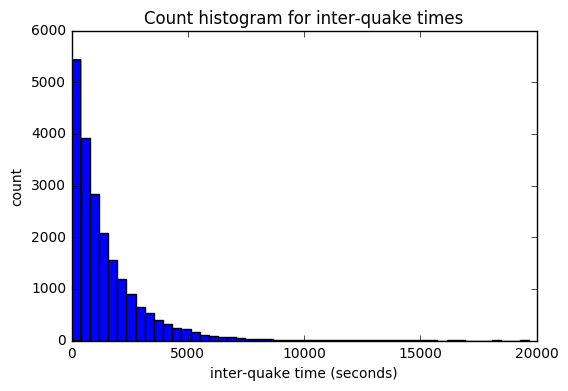

In [94]:
pylab.clf() # clear current figure
n, bins, patches = pylab.hist(interQuakesSecs, 50) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('inter-quake time (seconds)') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for inter-quake times')
pylab.savefig('myHist') # seem to need to have this to be able to actually display the figure
pylab.show() # and finally show it

Our 'best single guess' or point estimate $\widehat{\lambda}_n$ of the unknown $\lambda^* \in (0,\infty)$ is $\frac{n}{t_n}$

In [95]:
n = len(interQuakesSecs)
tn = sum(interQuakesSecs)
bestGuessSecs = n/tn
bestGuessSecs

0.00069393191132821478

Can you see how $\widehat{\lambda}_n$ relates to the sample mean?  Think about the Expectation of an $Exponential$ RV.

In [360]:
interQuakesSecs.mean() # mean inter-earthquake times in seconds again

1441.0635736378777

In [96]:
1/bestGuessSecs

1441.0635736378777

What about converting our data to give the inter-quake times in minutes rather than seconds:

In [97]:
import numpy as np
interQuakesMins = np.array([t/60 for t in interQuakesSecs])

And getting the best guess for $\lambda^*$ with the units as minutes:

In [98]:
n = len(interQuakesMins)
tn = sum(interQuakesMins)
bestGuessMins = n/tn
bestGuessMins

0.041635914679692881

Can you see how $\widehat{\lambda}_n$ relates to the sample mean?  Think about the Expectation of an $Exponential$ RV.

In [365]:
interQuakesMins.mean() # mean inter-earthquake times in minutes

24.017726227297963

In [366]:
1/bestGuessMins

24.017726227297963

What about the relationship between the best guess values for $\lambda^*$ when we are measuring time in different units.  Does this fit with the idea of $\lambda$ as a "rate"?

In [367]:
bestGuessSecs*60

0.041635914679692888

In [368]:
interQuakesMins.sum()

504732.51666666666

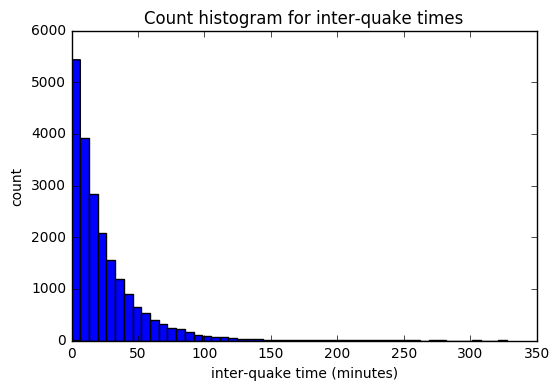

In [369]:
pylab.clf() # clear current figure
t = np.arange(0.0000000000001, 1000., 0.01)
n, bins, patches = pylab.hist(interQuakesMins, 50) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('inter-quake time (minutes)') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for inter-quake times')
pylab.savefig('myHist') # seem to need to have this to be able to actually display the figure
pylab.show() # and finally show it

### Some pointers on plotting in SageMath and Python

Here is a simple plot with three functions.

And the following one uses the histogram above and plots another function on top of it. These and more examples are from:

- [https://matplotlib.org/2.0.1/index.html](https://matplotlib.org/2.0.1/index.html)
- specifically from: [https://matplotlib.org/2.0.1/examples/pyplots/pyplot_three.html](https://matplotlib.org/2.0.1/examples/pyplots/pyplot_three.html)

Check out the matplotlib gallery:

- [https://matplotlib.org/2.0.1/gallery.html](https://matplotlib.org/2.0.1/gallery.html)

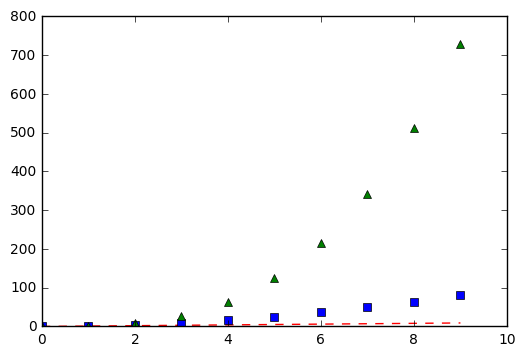

In [372]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0.0000000000001, 10., 1)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

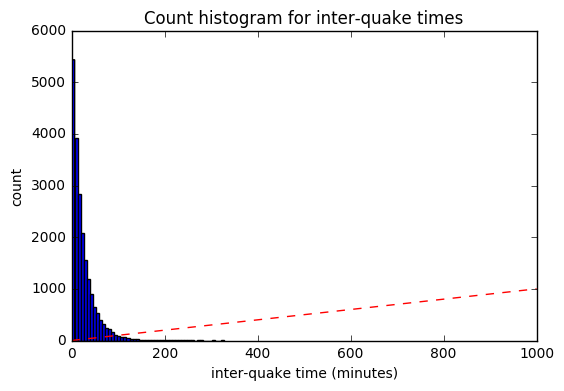

In [373]:
pylab.clf() # clear current figure
t = np.arange(0.0000000000001, 1000., 0.01)
n, bins, patches = pylab.hist(interQuakesMins, 50) # make the histogram (don't have to have n, bins, patches = ...)
pylab.xlabel('inter-quake time (minutes)') # use pyplot methods to set labels, titles etc similar to as in matlab
pylab.ylabel('count')
pylab.title('Count histogram for inter-quake times')
pylab.savefig('myHist') # seem to need to have this to be able to actually display the figure
# red dashes superimposed on histogram
pylab.plot(t, t, 'r--')
pylab.show() # and finally show it

## YouTry (later)

If you have time and you want to do more with Sage symbolic expressions, have a look at this optional section.  You should only start it when you are happy with the essential material above. 

Try solving a system of equations:

In [261]:
var('x y p q')
eq1 = p + q == 9
eq2 = q*y + p*x == -6
eq3 = q*y^2 + p*x^2 == 24
solve([eq1, eq2, eq3, p==1], p, q, x, y)

[[p == 1, q == 8, x == -4/3*sqrt(10) - 2/3, y == 1/6*sqrt(10) - 2/3], [p == 1, q == 8, x == 4/3*sqrt(10) - 2/3, y == -1/6*sqrt(10) - 2/3]]

If you look at the documentation for the `solve(...)` function, you'll see that you have the option of returning a list of dictionaries of the solutions.  

Think about that:  a list of dictionaries of the solutions.  

So, there can be more than one combination of variable values that can provide a solution, and a convenient way to indicate the values of each variable within each 'solving combination' is using a dictionary which maps a value to a variable (key).  

In [262]:
?solve

In [263]:
solns = solve([eq1, eq2, eq3, p==1], p, q, x, y, solution_dict = true)
solns

[{x: -4/3*sqrt(10) - 2/3, q: 8, p: 1, y: 1/6*sqrt(10) - 2/3},
 {x: 4/3*sqrt(10) - 2/3, q: 8, p: 1, y: -1/6*sqrt(10) - 2/3}]

When we have the list of dictionaries of the solutions, we can have a look at the values.  The following cell uses a list comprehension to take each dictionary in the list and find the values mapped to each variable.  

In [264]:
[[s[p].n(digits=10), s[q].n(digits=10), s[x].n(digits=10), s[y].n(digits=10)] \
                                                                        for s in solns]

[[1.000000000, 8.000000000, -4.883036880, -0.1396203900],
 [1.000000000, 8.000000000, 3.549703547, -1.193712943]]

Try some other systems of equations, or other features which catch your eye in the help page. 

# Take the Feature Tour of SageMath Now!

[http://www.sagemath.org/tour.html](http://www.sagemath.org/tour.html)

# Regression

- Point Estimation (parametric estimation with the likelihood principle and MLE)
  - linear and logistic models and their estimators (least squares estimators)
  - problem of prediction: in regression and classification
    - correlation versus causation
    - assessing fit using diagnostic plots
- Point Estimation (with empirical risk minimisation principle - point estimation with validation of penalised least squares estimators)
  - bias-variance trade-off (over-fitting)
  - hold-out estimators including cross-validation
  

*Raaz needs 8-12 hours*